## **06. 토픽 모델링(Topic Modeling) - 20 뉴스그룹**

**토픽 모델링(Topic Modeling)** : 문서 집합에 숨어 있는 주제를 찾아내는 것<br>
→ <span style="color:green">**LSA(Latent Semantic Analysis)**</span> or <span style="color:green">**LDA(Latent Dirichlet Allocation)**</span>

In [1]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# 모토사이클, 야구, 그래픽스, 윈도우즈, 중동, 기독교, 전자공학, 의학 8개 주제를 추출
cats = ['rec.motorcycles', 'rec.sport.baseball', 'comp.graphics', 'comp.windows.x',
        'talk.politics.mideast', 'soc.religion.christian', 'sci.electronics', 'sci.med']

# 위에서 cats 변수로 기재된 카테고리만 추출
# fetch_20newsgroups()의 categories에 cats 입력
news_df = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'), categories=cats, random_state=0)

# LDA는 Count 기반의 벡터화만 적용
count_vect = CountVectorizer(max_df=0.95, max_features=1000, min_df=2, stop_words='english', ngram_range=(1, 2))
feat_vect = count_vect.fit_transform(news_df.data)
print('CountVentorizer Shape :', feat_vect.shape)

CountVentorizer Shape : (7862, 1000)


In [2]:
lda = LatentDirichletAllocation(n_components=8, random_state=0)
lda.fit(feat_vect)

LatentDirichletAllocation(n_components=8, random_state=0)

In [3]:
print(lda.components_.shape)
lda.components_

(8, 1000)


array([[3.60992018e+01, 1.35626798e+02, 2.15751867e+01, ...,
        3.02911688e+01, 8.66830093e+01, 6.79285199e+01],
       [1.25199920e-01, 1.44401815e+01, 1.25045596e-01, ...,
        1.81506995e+02, 1.25097844e-01, 9.39593286e+01],
       [3.34762663e+02, 1.25176265e-01, 1.46743299e+02, ...,
        1.25105772e-01, 3.63689741e+01, 1.25025218e-01],
       ...,
       [3.60204965e+01, 2.08640688e+01, 4.29606813e+00, ...,
        1.45056650e+01, 8.33854413e+00, 1.55690009e+01],
       [1.25128711e-01, 1.25247756e-01, 1.25005143e-01, ...,
        9.17278769e+01, 1.25177668e-01, 3.74575887e+01],
       [5.49258690e+01, 4.47009532e+00, 9.88524814e+00, ...,
        4.87048440e+01, 1.25034678e-01, 1.25074632e-01]])

**각 토픽별로 연관도가 높은 순으로 Word를 나열**

In [4]:
def display_topics(model, feature_names, no_top_words):
    for topic_index, topic in enumerate(model.components_):
        print('Topic #{0}'.format(topic_index))
        
        # components_array에서 가장 값이 큰 순으로 정렬했을 때, 그 값의 array 인덱스를 반환
        topic_word_indexes = topic.argsort()[::-1]   # 처음부터 끝까지 -1칸 간격으로(역순으로)
        top_indexes = topic_word_indexes[:no_top_words]
        
        # top_indexes 대상인 인덱스별로 feature_names에 해당하는 word feature 추출 후 join으로 concat
        feature_concat = ' '.join([feature_names[i] for i in top_indexes])
        print(feature_concat)

# CountVectorizer 객체 내의 전체 word의 명칭을 get_feature_names()를 통해 추출
feature_names = count_vect.get_feature_names()

# 토픽별 가장 연관도가 높은 word를 15개만 추출
display_topics(lda, feature_names, 15)

Topic #0
year 10 game medical health team 12 20 disease cancer 1993 games years patients good
Topic #1
don just like know people said think time ve didn right going say ll way
Topic #2
image file jpeg program gif images output format files color entry 00 use bit 03
Topic #3
like know don think use does just good time book read information people used post
Topic #4
armenian israel armenians jews turkish people israeli jewish government war dos dos turkey arab armenia 000
Topic #5
edu com available graphics ftp data pub motif mail widget software mit information version sun
Topic #6
god people jesus church believe christ does christian say think christians bible faith sin life
Topic #7
use dos thanks windows using window does display help like problem server need know run


## **07. 문서 군집화 소개와 실습(Opinion Review 데이터 세트)**

### **문서 군집화 개념**

**문서 군집화(Document Clustering)** : 비슷한 텍스트 구성의 문서를 군집화(Clustering)하는 것<br>
→ 텍스트 분류 기반의 문서 분류는 사전에 결정 카테고리값을 가진 학습 데이터 세트가 필요한 데 반해, <span style="color:blue">**문서 군집화는 학습 데이터 세트가 필요 없는 비지도학습 기반으로 동작**</span>

### **Opinion Review 데이터 세트를 이용한 문서 군집화 수행하기**

In [5]:
# https://archive.ics.uci.edu/ml/datasets/Opinosis+Opinion+%26frasl%3B+Review

In [6]:
import pandas as pd
import glob, os

# 데이터가 있는 디렉토리 경로
path = r'C:\Users\khl06\Desktop\Mr.GentleKim\TIL\Self-Study\pymldg\OpinosisDataset1.0/topics'
# path로 지정한 디렉토리 밑에 있는 모든 .data 파일의 파일명을 리스트로 취합
all_files = glob.glob(os.path.join(path, '*.data'))
filename_list = []
opinion_text = []

# 개별 파일의 파일명은 filename_list로 취합하고,
# 개별 파일의 파일 내용은 DataFrame 로딩 후 다시 string으로 변환해 opinion_text list로 취합
for file_ in all_files:
    # 개별 파일을 읽어서 DataFrame으로 생성
    df = pd.read_table(file_, index_col=None, header=0, encoding='latin1')
    
    # 절대 경로로 주어진 파일명을 가공(리눅스에서 수행할 때는 다음 \\를 /로 변경)
    # 맨 마지막 .data 확장자도 제거
    filename_ = file_.split('\\')[-1]
    filename = filename_.split('.')[0]
    
    # 파일명 list와 파일 내용 list에 파일명과 파일 내용을 추가
    filename_list.append(filename)
    opinion_text.append(df.to_string())

# 파일명 list와 파일 내용 list 객체를 DataFrame으로 생성
document_df = pd.DataFrame({'filename': filename_list, 'opinion_text': opinion_text})
document_df.head()

,filename,opinion_text
0,accuracy_garmin_nuvi_255W_gps,...
1,bathroom_bestwestern_hotel_sfo,...
2,battery-life_amazon_kindle,...
3,battery-life_ipod_nano_8gb,...
4,battery-life_netbook_1005ha,...


In [7]:
from nltk.stem import WordNetLemmatizer
import nltk
import string

remove_punct_dict = dict((ord(punct), None) for punct in string.punctuation)
lemmar = WordNetLemmatizer()

def LemTokens(tokens):
    return [lemmar.lemmatize(token) for token in tokens]

def LemNormalize(text):
    return LemTokens(nltk.word_tokenize(text.lower().translate(remove_punct_dict)))

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(tokenizer=LemNormalize, stop_words='english',
                              ngram_range=(1, 2), min_df=0.05, max_df=0.85)

# opinion_text 컬럼값으로 피처 벡터화 수행
feature_vect = tfidf_vect.fit_transform(document_df['opinion_text'])

C:\Users\khl06\anaconda3\envs\multi\lib\site-packages\sklearn\feature_extraction\text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


**K-Means Clustering 수행**

In [9]:
from sklearn.cluster import KMeans

# 5개 잡합으로 군집화 수행
km_cluster = KMeans(n_clusters=5, max_iter=10000, random_state=0)
km_cluster.fit(feature_vect)
cluster_label = km_cluster.labels_
cluster_centers = km_cluster.cluster_centers_

In [10]:
document_df['cluster_label'] = cluster_label
document_df.head()

,filename,opinion_text,cluster_label
0,accuracy_garmin_nuvi_255W_gps,...,2
1,bathroom_bestwestern_hotel_sfo,...,0
2,battery-life_amazon_kindle,...,1
3,battery-life_ipod_nano_8gb,...,1
4,battery-life_netbook_1005ha,...,1


In [11]:
document_df[document_df['cluster_label']==0].sort_values(by='filename')

,filename,opinion_text,cluster_label
1,bathroom_bestwestern_hotel_sfo,...,0
32,room_holiday_inn_london,...,0
30,rooms_bestwestern_hotel_sfo,...,0
31,rooms_swissotel_chicago,...,0


In [12]:
document_df[document_df['cluster_label']==1].sort_values(by='filename')

,filename,opinion_text,cluster_label
2,battery-life_amazon_kindle,...,1
3,battery-life_ipod_nano_8gb,...,1
4,battery-life_netbook_1005ha,...,1
19,keyboard_netbook_1005ha,...,1
26,performance_netbook_1005ha,...,1
41,size_asus_netbook_1005ha,...,1
42,sound_ipod_nano_8gb,headphone jack i got a clear case for it a...,1
44,speed_windows7,...,1


In [13]:
document_df[document_df['cluster_label']==2].sort_values(by='filename')

,filename,opinion_text,cluster_label
0,accuracy_garmin_nuvi_255W_gps,...,2
5,buttons_amazon_kindle,...,2
8,directions_garmin_nuvi_255W_gps,...,2
9,display_garmin_nuvi_255W_gps,...,2
10,eyesight-issues_amazon_kindle,...,2
11,features_windows7,...,2
12,fonts_amazon_kindle,...,2
23,navigation_amazon_kindle,...,2
33,satellite_garmin_nuvi_255W_gps,...,2
34,screen_garmin_nuvi_255W_gps,...,2


In [14]:
document_df[document_df['cluster_label']==3].sort_values(by='filename')

,filename,opinion_text,cluster_label
13,food_holiday_inn_london,...,3
14,food_swissotel_chicago,...,3
15,free_bestwestern_hotel_sfo,...,3
20,location_bestwestern_hotel_sfo,...,3
21,location_holiday_inn_london,...,3
24,parking_bestwestern_hotel_sfo,...,3
27,price_amazon_kindle,...,3
28,price_holiday_inn_london,...,3
38,service_bestwestern_hotel_sfo,...,3
39,service_holiday_inn_london,...,3


In [15]:
document_df[document_df['cluster_label']==4].sort_values(by='filename')

,filename,opinion_text,cluster_label
6,comfort_honda_accord_2008,...,4
7,comfort_toyota_camry_2007,...,4
16,gas_mileage_toyota_camry_2007,...,4
17,interior_honda_accord_2008,...,4
18,interior_toyota_camry_2007,...,4
22,mileage_honda_accord_2008,...,4
25,performance_honda_accord_2008,...,4
29,quality_toyota_camry_2007,...,4
37,seats_honda_accord_2008,...,4
47,transmission_toyota_camry_2007,...,4


**3개 그룹으로 다시 군집화**

In [16]:
from sklearn.cluster import KMeans

# 3개의 집합으로 군집화
km_cluster = KMeans(n_clusters=3, max_iter=10000, random_state=0)
km_cluster.fit(feature_vect)
cluster_label = km_cluster.labels_
cluster_centers = km_cluster.cluster_centers_

# 소속 군집을 cluster_label 컬럼으로 할당하고 cluster_label값으로 정렬
document_df['cluster_label'] = cluster_label
document_df.sort_values(by='cluster_label')

,filename,opinion_text,cluster_label
0,accuracy_garmin_nuvi_255W_gps,...,0
48,updates_garmin_nuvi_255W_gps,...,0
44,speed_windows7,...,0
43,speed_garmin_nuvi_255W_gps,...,0
42,sound_ipod_nano_8gb,headphone jack i got a clear case for it a...,0
41,size_asus_netbook_1005ha,...,0
36,screen_netbook_1005ha,...,0
35,screen_ipod_nano_8gb,...,0
34,screen_garmin_nuvi_255W_gps,...,0
33,satellite_garmin_nuvi_255W_gps,...,0


In [17]:
document_df[document_df['cluster_label']==0].sort_values(by='filename')

,filename,opinion_text,cluster_label
0,accuracy_garmin_nuvi_255W_gps,...,0
2,battery-life_amazon_kindle,...,0
3,battery-life_ipod_nano_8gb,...,0
4,battery-life_netbook_1005ha,...,0
5,buttons_amazon_kindle,...,0
8,directions_garmin_nuvi_255W_gps,...,0
9,display_garmin_nuvi_255W_gps,...,0
10,eyesight-issues_amazon_kindle,...,0
11,features_windows7,...,0
12,fonts_amazon_kindle,...,0


In [18]:
document_df[document_df['cluster_label']==1].sort_values(by='filename')

,filename,opinion_text,cluster_label
6,comfort_honda_accord_2008,...,1
7,comfort_toyota_camry_2007,...,1
16,gas_mileage_toyota_camry_2007,...,1
17,interior_honda_accord_2008,...,1
18,interior_toyota_camry_2007,...,1
22,mileage_honda_accord_2008,...,1
25,performance_honda_accord_2008,...,1
29,quality_toyota_camry_2007,...,1
37,seats_honda_accord_2008,...,1
47,transmission_toyota_camry_2007,...,1


In [19]:
document_df[document_df['cluster_label']==2].sort_values(by='filename')

,filename,opinion_text,cluster_label
1,bathroom_bestwestern_hotel_sfo,...,2
13,food_holiday_inn_london,...,2
14,food_swissotel_chicago,...,2
15,free_bestwestern_hotel_sfo,...,2
20,location_bestwestern_hotel_sfo,...,2
21,location_holiday_inn_london,...,2
24,parking_bestwestern_hotel_sfo,...,2
28,price_holiday_inn_london,...,2
32,room_holiday_inn_london,...,2
30,rooms_bestwestern_hotel_sfo,...,2


In [20]:
document_df[document_df['cluster_label']==3].sort_values(by='filename')

,filename,opinion_text,cluster_label


### **군집별 핵심 단어 추출하기**

In [21]:
cluster_centers = km_cluster.cluster_centers_
print('cluster_centers shape :', cluster_centers.shape)
print(cluster_centers)

cluster_centers shape : (3, 4611)
[[0.01005322 0.         0.         ... 0.00706287 0.         0.        ]
 [0.         0.00092551 0.         ... 0.         0.         0.        ]
 [0.         0.00099499 0.00174637 ... 0.         0.00183397 0.00144581]]


****cluster_centers_***<br>
: 각 행의 배열값은 각 군집 내의 4611개 피처의 위치가 개별 중심과 얼마나 가까운가를 상대값으로 나타낸 것으로, **0에서 1까지의 값을 가질 수 있으며 1에 가까울수록 중심과 가까운 값을 의미**

In [22]:
# 군집별 top_n 핵심 단어, 그 단어의 중심 위치 상대값, 대상 파일명을 반환
def get_cluster_details(cluster_model, cluster_data, feature_names, clusters_num, top_n_features=10):
    cluster_details = {}
    
    # cluster_centers array의 값이 큰 순으로 정렬된 인덱스값을 반환
    # 군집 중심점(centroid)별 할당된 word 피처들의 거리값이 큰 순으로 값을 구하기 위함
    centroid_feature_ordered_ind = cluster_model.cluster_centers_.argsort()[:, ::-1]
    
    # 개별 군집별로 반복하면서 핵심 단어, 그 단어의 중심 위치 상대값, 대상 파일명 입력
    for cluster_num in range(clusters_num):
        # 개별 군집별 정보를 담을 데이터 초기화
        cluster_details[cluster_num] = {}
        cluster_details[cluster_num]['cluster'] = cluster_num
        
        # cluster_centers_.argsort()[:, ::-1]로 구한 인덱스를 이용해 top n 피처 단어를 구함
        top_feature_indexes = centroid_feature_ordered_ind[cluster_num, :top_n_features]
        top_features = [feature_names[ind] for ind in top_feature_indexes]
        
        # top_feature_indexes를 이용해 해당 피처 단어의 중심 위치 상대값 구함
        top_feature_values = cluster_model.cluster_centers_[cluster_num, top_feature_indexes].tolist()
        
        # cluster_details 딕셔너리 객체에 개별 군집별 핵심 단어와 중심 위치 상대값, 해당 파일명 입력
        cluster_details[cluster_num]['top_features'] = top_features
        cluster_details[cluster_num]['top_features_value'] = top_feature_values
        filenames = cluster_data[cluster_data['cluster_label'] == cluster_num]['filename']
        
        cluster_details[cluster_num]['filenames'] = filenames
    
    return cluster_details

In [23]:
def print_cluster_details(cluster_details):
    for cluster_num, cluster_detail in cluster_details.items():
        print('##### Cluster {0} #####'.format(cluster_num))
        print('Top features :', cluster_detail['top_features'])
        print('Reviews 파일명 :', cluster_detail['filenames'][:7])
        print('==============================================')

In [24]:
feature_names = tfidf_vect.get_feature_names()

cluster_details = get_cluster_details(cluster_model=km_cluster, cluster_data=document_df,
                                      feature_names=feature_names, clusters_num=3, top_n_features=10)
print_cluster_details(cluster_details)

##### Cluster 0 #####
Top features : ['screen', 'battery', 'keyboard', 'battery life', 'life', 'kindle', 'direction', 'video', 'size', 'voice']
Reviews 파일명 : 0      accuracy_garmin_nuvi_255W_gps
2         battery-life_amazon_kindle
3         battery-life_ipod_nano_8gb
4        battery-life_netbook_1005ha
5              buttons_amazon_kindle
8    directions_garmin_nuvi_255W_gps
9       display_garmin_nuvi_255W_gps
Name: filename, dtype: object
##### Cluster 1 #####
Top features : ['interior', 'seat', 'mileage', 'comfortable', 'gas', 'gas mileage', 'transmission', 'car', 'performance', 'quality']
Reviews 파일명 : 6         comfort_honda_accord_2008
7         comfort_toyota_camry_2007
16    gas_mileage_toyota_camry_2007
17       interior_honda_accord_2008
18       interior_toyota_camry_2007
22        mileage_honda_accord_2008
25    performance_honda_accord_2008
Name: filename, dtype: object
##### Cluster 2 #####
Top features : ['room', 'hotel', 'service', 'staff', 'food', 'location', 'bathro

## **08. 문서 유사도**

### **문서 유사도 측정 방법 - 코사인 유사도**

<span style="color:orange">**코사인 유사도(Cosine Similarity)**</span><br>
: 벡터와 벡터 간의 유사도를 비교할 때 벡터의 크기보다는 **벡터의 상호 방향성이 얼마나 유사한지에 기반**으로, ***두 벡터 사이의 사잇각***을 구해서 얼마나 유사한지 수치로 적용하고

### **두 벡터 사잇각**

In [25]:
import numpy as np

def cos_similarity(v1, v2):
    dot_product = np.dot(v1, v2)
    l2_norm = (np.sqrt(sum(np.square(v1))) * np.sqrt(sum(np.square(v2))))
    similarity = dot_product / l2_norm
    
    return similarity

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer

doc_list = ['if you take the blue pill, the story ends',
            'if you take the red pill, you stay in Wonderland',
            'if you take the red pill, I show you how deep the rabbit hole goes']

tfidf_vect_simple = TfidfVectorizer()
feature_vect_simple = tfidf_vect_simple.fit_transform(doc_list)
print(feature_vect_simple.shape)

(3, 18)


In [27]:
# TfidfVectorizer로 transform()한 결과는 희소 행렬이므로 밀집 행렬로 변환
feature_vect_dense = feature_vect_simple.todense()

# 첫 번째 문장과 두 번째 문장의 피처 벡터 추출
vect1 = np.array(feature_vect_dense[0]).reshape(-1, )
vect2 = np.array(feature_vect_dense[1]).reshape(-1, )

# 첫 번째 문장과 두 번째 문장의 피처 벡터로 두 개 문장의 코사인 유사도 추출
similarity_simple = cos_similarity(vect1, vect2)
print('문장 1과 문장 2의 Cosine 유사도 : {0:.3f}'.format(similarity_simple))

문장 1과 문장 2의 Cosine 유사도 : 0.402


In [28]:
vect1 = np.array(feature_vect_dense[0]).reshape(-1, )
vect3 = np.array(feature_vect_dense[2]).reshape(-1, )
similarity_simple = cos_similarity(vect1, vect3)
print('문장 1과 문장 3의 Cosine 유사도 : {0:.3f}'.format(similarity_simple))

vect2 = np.array(feature_vect_dense[1]).reshape(-1, )
vect3 = np.array(feature_vect_dense[2]).reshape(-1, )
similarity_simple = cos_similarity(vect2, vect3)
print('문장 2과 문장 3의 Cosine 유사도 : {0:.3f}'.format(similarity_simple))

문장 1과 문장 3의 Cosine 유사도 : 0.404
문장 2과 문장 3의 Cosine 유사도 : 0.456


***사이킷런 API의 cosine_similarity()***
- 첫 번째 파라미터 : **비교 기준**이 되는 문서의 피처 행렬
- 두 번째 파라미터 : **비교되는** 문서의 피처 행렬

In [29]:
from sklearn.metrics.pairwise import cosine_similarity

similarity_simple_pair = cosine_similarity(feature_vect_simple[0], feature_vect_simple)
print(similarity_simple_pair)

[[1.         0.40207758 0.40425045]]


In [30]:
from sklearn.metrics.pairwise import cosine_similarity

similarity_simple_pair = cosine_similarity(feature_vect_simple[0], feature_vect_simple[1:])
print(similarity_simple_pair)

[[0.40207758 0.40425045]]


In [31]:
similarity_simple_pair = cosine_similarity(feature_vect_simple, feature_vect_simple)
print(similarity_simple_pair)
print('shape :', similarity_simple_pair.shape)

[[1.         0.40207758 0.40425045]
 [0.40207758 1.         0.45647296]
 [0.40425045 0.45647296 1.        ]]
shape : (3, 3)


<AxesSubplot:>

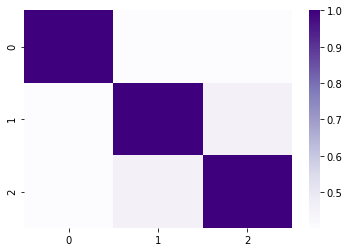

In [32]:
import seaborn as sns

sns.heatmap(data=similarity_simple_pair, cmap='Purples')

### **Opinion Review 데이터 세트를 이용한 문서 유사도 측정**

In [33]:
import pandas as pd
import glob, os
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

path = r'C:\Users\khl06\Desktop\Mr.GentleKim\TIL\Self-Study\pymldg\OpinosisDataset1.0\topics'
all_files = glob.glob(os.path.join(path, '*.data'))
filename_list = []
opinion_text = []

for file_ in all_files:
    df = pd.read_table(file_, index_col=None, header=0, encoding='latin1')
    filename_ = file_.split('\\')[-1]
    filename = filename_.split('.')[0]
    filename_list.append(filename)
    opinion_text.append(df.to_string())

document_df = pd.DataFrame({'filename': filename_list, 'opinion_text': opinion_text})

tfidf_vect = TfidfVectorizer(tokenizer=LemNormalize, stop_words='english',
                             ngram_range=(1, 2), min_df=0.05, max_df=0.85)
feature_vect = tfidf_vect.fit_transform(document_df['opinion_text'])

# K-Means Clustering
km_cluster = KMeans(n_clusters=3, max_iter=10000, random_state=0)
km_cluster.fit(feature_vect)
cluster_label = km_cluster.labels_
cluster_centers = km_cluster.cluster_centers_
document_df['cluster_label'] = cluster_label

C:\Users\khl06\anaconda3\envs\multi\lib\site-packages\sklearn\feature_extraction\text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


In [34]:
from sklearn.metrics.pairwise import cosine_similarity

# cluster_label=1인 데이터는 호텔로 군집화된 데이터로, DataFrame에서 해당 인덱스를 추출
hotel_indexes = document_df[document_df['cluster_label']==1].index
print('호텔로 군집화된 문서들의 DataFrame Index :', hotel_indexes)

# 호텔로 군집화된 데이터 중 첫 번째 문서를 추출해 파일명 표시
comparison_docname = document_df.iloc[hotel_indexes[0]]['filename']
print('##### 비교 기준 문서 {0}과 타 문서 유사도 #####'.format(comparison_docname))

# document_df에서 추출한 Index 객체를 feature_vect로 입력해 호텔 군집화된 feature_vect 추출
# 이를 이용해 호텔로 군집화된 문서 중 첫 번째 문서와 다른 문서 간의 코사인 유사도 측정
similarity_pair = cosine_similarity(feature_vect[hotel_indexes[0]], feature_vect[hotel_indexes])
print(similarity_pair)

호텔로 군집화된 문서들의 DataFrame Index : Int64Index([6, 7, 16, 17, 18, 22, 25, 29, 37, 47], dtype='int64')
##### 비교 기준 문서 comfort_honda_accord_2008과 타 문서 유사도 #####
[[1.         0.83969704 0.15655631 0.33044002 0.25981841 0.16544257
  0.27569738 0.18050974 0.65502034 0.06229873]]


Text(0.5, 1.0, 'comfort_honda_accord_2008')

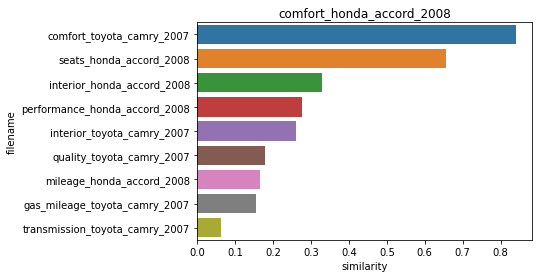

In [35]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 첫 번째 문서와 타 문서 간 유사도가 큰 순으로 정렬한 인덱스를 추출하되 자기 자신은 제외
sorted_index = similarity_pair.argsort()[:, ::-1]
sorted_index = sorted_index[:, 1:]

# 유사도가 큰 순으로 hotel_indexes를 추출해 재정렬
hotel_sorted_indexes = hotel_indexes[sorted_index.reshape(-1)]

# 유사도가 큰 순으로 유사도값을 재정렬하되 자기 자신은 제외
hotel_1_sim_value = np.sort(similarity_pair.reshape(-1))[::-1]
hotel_1_sim_value = hotel_1_sim_value[1:]

# 유사도가 큰 순으로 정렬된 인덱스와 유사도값을 이용해 파일명과 유사도값을 막대 그래프로 시각화
hotel_1_sim_df = pd.DataFrame()
hotel_1_sim_df['filename'] = document_df.iloc[hotel_sorted_indexes]['filename']
hotel_1_sim_df['similarity'] = hotel_1_sim_value

sns.barplot(x='similarity', y='filename', data=hotel_1_sim_df)
plt.title(comparison_docname)

## **09. 한글 텍스트 처리 - 네이버 영화 평점 감성 분석**

<span style="color:blue">***KoNLPy***</span><br>
: Python의 대표적인 한글 형태소 패키지
- <span style="color:green">**형태소 분석(Morphological Analysis)**</span> : 말뭉치를 **'단어로서 의미를 가지는 최소 단위'인 형태소** 어근 단위로 쪼개고 각 형태소에 품사 태깅(POS tagging)을 부착하는 작업

In [36]:
# 설치 과정은 교재 p.537~ 참고
# https://konlpy-ko.readthedocs.io/ko/v0.4.3/install/
# https://www.oracle.com/technetwork/java/javase/downloads/index.html

### **데이터 로딩 - 네이버 영화 평점 데이터**

In [37]:
# https://github.com/e9t/nsmc

In [38]:
import pandas as pd

train_df = pd.read_csv('ratings_train.txt', sep='\t')
train_df.head(3)

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0


In [39]:
train_df['label'].value_counts()

0    75173
1    74827
Name: label, dtype: int64

In [40]:
import re

train_df = train_df.fillna(' ')
# 정규 표현식을 이용해 숫자를 공백으로 변경(정규 표현식으로 \d는 숫자를 의미)
train_df['document'] = train_df['document'].apply(lambda x: re.sub(r"\d+", " ", x))

# 테스트 데이터 세트를 로딩하고 동일하게 Null 및 숫자를 공백으로 변환
test_df = pd.read_csv('ratings_test.txt', sep='\t')
test_df = test_df.fillna(' ')
test_df['document'] = test_df['document'].apply(lambda x: re.sub(r"\d+", " ", x))

# id 컬럼 삭제 수행
train_df.drop('id', axis=1, inplace=True)
test_df.drop('id', axis=1, inplace=True)

***Twitter 객체의 morphs() mothod*** → 문장을 형태소 단어 형태로 토큰화해 list 객체로 반환

In [41]:
from konlpy.tag import Okt

twitter = Okt()
def tw_tokenizer(text):
    # 입력 인자로 들어온 텍스트를 형태소 단어로 토큰화해 리스트 형태로 반환
    tokens_ko = twitter.morphs(text)
    return tokens_ko

In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Twitter 객체의 morphs() 객체를 이용한 tokenizer를 사용하고, ngram_range는 (1, 2)
tfidf_vect = TfidfVectorizer(tokenizer=tw_tokenizer, ngram_range=(1, 2), min_df=3, max_df=0.9)
tfidf_vect.fit(train_df['document'])
tfidf_matrix_train = tfidf_vect.transform(train_df['document'])

C:\Users\khl06\anaconda3\envs\multi\lib\site-packages\sklearn\feature_extraction\text.py:489: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


In [43]:
# 로지스틱 회귀를 이용해 감성 분석 분류 수행
lg_clf = LogisticRegression(random_state=0)

# 파라미터 C 최적화를 위해 GridSearchCV를 이용
params = {'C': [1, 3.5, 4.5, 5.5, 10]}
grid_cv = GridSearchCV(lg_clf, param_grid=params, cv=3, scoring='accuracy', verbose=1)
grid_cv.fit(tfidf_matrix_train, train_df['label'])
print(grid_cv.best_params_, round(grid_cv.best_score_, 4))

Fitting 3 folds for each of 5 candidates, totalling 15 fits


C:\Users\khl06\anaconda3\envs\multi\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\khl06\anaconda3\envs\multi\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logisti

{'C': 4.5} 0.8592


C:\Users\khl06\anaconda3\envs\multi\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [44]:
from sklearn.metrics import accuracy_score

# 학습 데이터를 적용한 TfidfVectorizer를 이용해 테스트 데이터를 TF-IDF값으로 피처 변환
tfidf_matrix_test = tfidf_vect.transform(test_df['document'])

# classifier는 GridSearchCV에서 최적 파라미터로 학습된 Classifier를 그대로 이용
best_estimator = grid_cv.best_estimator_
preds = best_estimator.predict(tfidf_matrix_test)

print('Logistic Regression 정확도 :', accuracy_score(test_df['label'], preds))

Logistic Regression 정확도 : 0.86178
